In [84]:
import torch 
from torch import nn
import numpy as np
TWOJ_KOD = None 
# TODO: Zaprojektuj sieć neuronową która konsumuje wektory o długości 384 (embeddingi) i zwraca binarną odpowiedź (sigmoid) 
# Pośrednie warstwy niech mają kolejno 150 i 15 neuronów a funkcjami aktywacji niech będzie nn.ReLU 
class ReviewClassifier(nn.Module):
    def __init__(self):
        super().__init__()        
        self.mlp = nn.Sequential(
            nn.Linear(384, 150),
            nn.ReLU(),
            nn.Linear(150, 15),
            nn.ReLU(),
            nn.Linear(15, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):        
        return self.mlp(x)

In [85]:
import pandas as pd 
#TODO: wczytaj zapisane dane z embeddingami 
df = pd.read_feather("allegro_with_embeddings_B.bin")

In [86]:
df = df.sample(frac=1.0) #shuffle
# TODO: Podziel dane na train, val, test (25k, 5k, reszta) 
train_df = df[:6624]
val_df = df[6624:7912]
test_df = df[7912:]

In [87]:
from torchmetrics import Accuracy
from tqdm.notebook import tqdm 
import numpy as np 
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()
model = ReviewClassifier()
bce_loss = nn.BCELoss() # TODO: https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

accuracies_per_epoch = []
batch_size = 128
adam_optimizer = torch.optim.Adam(model.parameters()) #TODO: https://pytorch.org/docs/stable/generated/torch.optim.Adam.html [use lr=0.0005]
nr_of_epochs = 450
losses = []
for epoch in tqdm(range(nr_of_epochs)):
    # shuffle 
    train_df = train_df.sample(frac=1.0)
    print(len(train_df))
    current_index = 0 
    while current_index < len(train_df):        
        batch_x = np.array(
            train_df.embeddings[current_index:(current_index + batch_size)].tolist()
        )
        batch_y = np.array(
            train_df.rating[current_index: (current_index + batch_size)].tolist()
        )
        
        tensor_batch_x = torch.Tensor(batch_x)
        tensor_batch_y = torch.Tensor(batch_y).reshape(-1, 1)
        
        pred = model.forward(tensor_batch_x)
        loss = bce_loss(pred, tensor_batch_y)
 
        # Backpropagation
        loss.backward() # Liczenie gradientu wag modelu
        adam_optimizer.step() # adam oblicza nowe parametry sieci 
        adam_optimizer.zero_grad()
        
        current_index += batch_size
        losses.append(float(loss.detach().numpy()))
        
    model.eval()
    metric = Accuracy(task='BINARY')
    for _, eval_row in tqdm(val_df.iterrows(), desc='evaluating'):
        pred = model.forward(
            torch.Tensor(np.array(eval_row.embeddings))
        )
        metric.update(pred, torch.Tensor([eval_row.rating]))
    metric_value = metric.compute()
    accuracies_per_epoch.append(metric_value)
    writer.add_scalar('Accuracy/eval', metric_value, epoch)

        

  0%|          | 0/450 [00:00<?, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

6624


evaluating: 0it [00:00, ?it/s]

In [88]:
from sentence_transformers import SentenceTransformer
sentence_transformer = SentenceTransformer("all-MiniLM-L6-v2")

In [89]:
review = review = """Jonathan Smith's latest novel, *Time in Twilight*, certainly leaves an impression. From the opening chapter, readers are thrust into a world that Smith describes with an abundance of detail that some might find lavish while others could deem excessively verbose. The protagonist, Elara, is as enigmatic as the plot itself; she navigates through her twilight realm with a blend of stoicism and emotiveness that straddles the line between intriguing and puzzling. The pacing of the story might challenge the patience of those accustomed to a brisk narrative, yet for others, it provides a thoughtful, almost meditative examination of themes that resonate deeply in our current era. Smith's stylistic choices, especially his penchant for obscure metaphors, will undoubtedly polarize; they are either strokes of genius or puzzling distractions. Overall, *Time in Twilight* is a book that will be remembered, whether for its ambitious scope or intricate idiosyncrasies."""
encoded_review = sentence_transformer.encode(review)

In [90]:
model.forward(torch.Tensor(encoded_review))

tensor([8.7928e-17], grad_fn=<SigmoidBackward0>)

In [91]:
losses

[0.681666910648346,
 0.6725338101387024,
 0.6746135950088501,
 0.6647240519523621,
 0.6815543174743652,
 0.6745673418045044,
 0.6747317314147949,
 0.6437901258468628,
 0.6806095242500305,
 0.6691461205482483,
 0.6541888117790222,
 0.6642566323280334,
 0.6705148220062256,
 0.6587295532226562,
 0.660510778427124,
 0.6403868794441223,
 0.6159483194351196,
 0.6438888907432556,
 0.6466230750083923,
 0.6696285009384155,
 0.6168714761734009,
 0.6500520706176758,
 0.6866517663002014,
 0.6520202159881592,
 0.6620652675628662,
 0.6171106100082397,
 0.6714526414871216,
 0.6827130317687988,
 0.6312203407287598,
 0.613624095916748,
 0.6405470371246338,
 0.6522574424743652,
 0.5567718744277954,
 0.6597205996513367,
 0.6259629726409912,
 0.6196060180664062,
 0.6033990383148193,
 0.6255961060523987,
 0.6097203493118286,
 0.6525278091430664,
 0.6373856663703918,
 0.6003544330596924,
 0.6401858329772949,
 0.6622883081436157,
 0.6221334934234619,
 0.590554416179657,
 0.578426718711853,
 0.580195248126983

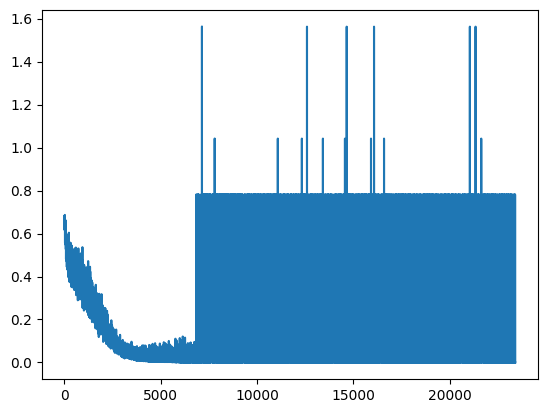

In [92]:
from matplotlib import pyplot as plt
plt.plot(losses)
plt.show()

In [93]:
len(losses)

23400

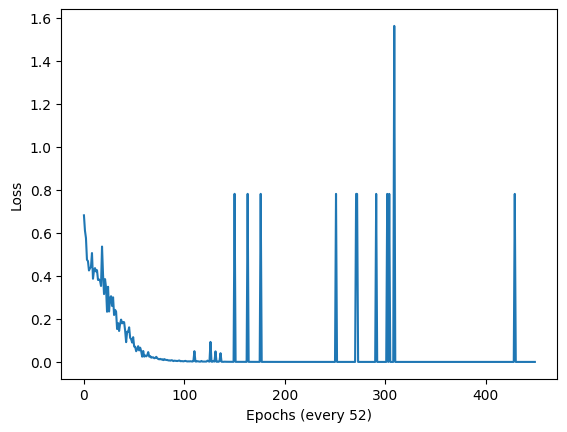

In [94]:
plt.xlabel("Epochs (every 52)")
plt.ylabel("Loss")
plt.plot(losses[::52])
plt.show()

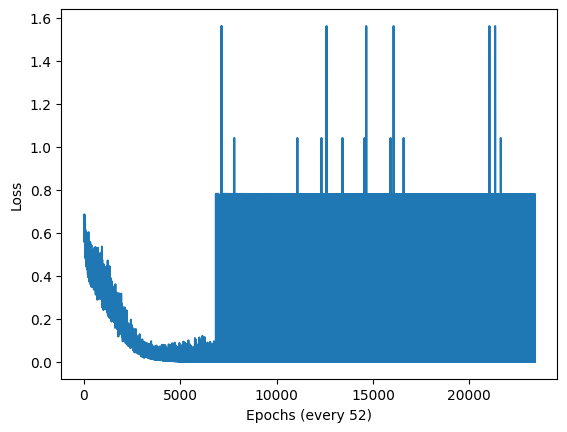

In [95]:
plt.xlabel("Epochs (every 52)")
plt.ylabel("Loss")
plt.plot(losses)
plt.show()

In [96]:
accuracies_per_epoch

[tensor(0.6708),
 tensor(0.7143),
 tensor(0.7547),
 tensor(0.7578),
 tensor(0.7694),
 tensor(0.7748),
 tensor(0.7725),
 tensor(0.7826),
 tensor(0.7811),
 tensor(0.7787),
 tensor(0.7795),
 tensor(0.7772),
 tensor(0.7904),
 tensor(0.7725),
 tensor(0.7834),
 tensor(0.7741),
 tensor(0.7818),
 tensor(0.7834),
 tensor(0.7733),
 tensor(0.7803),
 tensor(0.7795),
 tensor(0.7694),
 tensor(0.7803),
 tensor(0.7694),
 tensor(0.7725),
 tensor(0.7741),
 tensor(0.7780),
 tensor(0.7570),
 tensor(0.7772),
 tensor(0.7772),
 tensor(0.7671),
 tensor(0.7624),
 tensor(0.7632),
 tensor(0.7725),
 tensor(0.7733),
 tensor(0.7640),
 tensor(0.7601),
 tensor(0.7648),
 tensor(0.7686),
 tensor(0.7632),
 tensor(0.7679),
 tensor(0.7663),
 tensor(0.7593),
 tensor(0.7609),
 tensor(0.7616),
 tensor(0.7585),
 tensor(0.7508),
 tensor(0.7547),
 tensor(0.7554),
 tensor(0.7484),
 tensor(0.7585),
 tensor(0.7547),
 tensor(0.7539),
 tensor(0.7461),
 tensor(0.7508),
 tensor(0.7516),
 tensor(0.7531),
 tensor(0.7547),
 tensor(0.7585

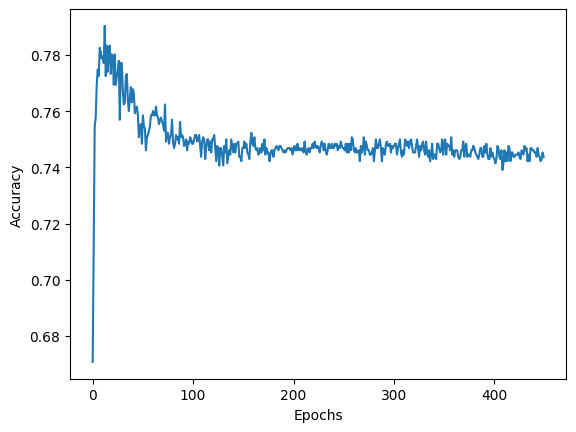

In [97]:
plt.plot([float(acc) for acc in accuracies_per_epoch])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [98]:
empty_model = ReviewClassifier()
print(empty_model)
print(dir(empty_model))
print(list(empty_model.parameters()))

ReviewClassifier(
  (mlp): Sequential(
    (0): Linear(in_features=384, out_features=150, bias=True)
    (1): ReLU()
    (2): Linear(in_features=150, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=1, bias=True)
    (5): Sigmoid()
  )
)
['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_backward_pre_hooks', '_buffers', '_call_impl', '_compiled_call_impl', '_forward_hooks', '_forward_hooks_always_called', '_forward_hooks_with_kwargs', '_forward_pre_hooks', '_forward_pre_hooks_with_kwargs', '_get_backward_hooks', '_get_backward_pre_hoo

In [99]:
1 - 0.2344

0.7656000000000001